In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from IPython.display import Image
import pydotplus
import graphviz
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('C:\\Users\\liuth\\Documents\\Python Scripts\\ThinkfulProjects\\Data')

In [4]:
df = pd.read_csv('creditcard.csv')

Classification Problem to identify credit card fraud

---

Data Exploration and Wrangle

In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# Separate the majority and minority Class.
df_maj = df[df.Class==0]
df_min = df[df.Class==1]


# Downsample majority class 
df_maj_downsampled = resample(df_maj, 
                                 replace=False,    
                                 n_samples=len(df_min))
                                
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_maj_downsampled, df_min])

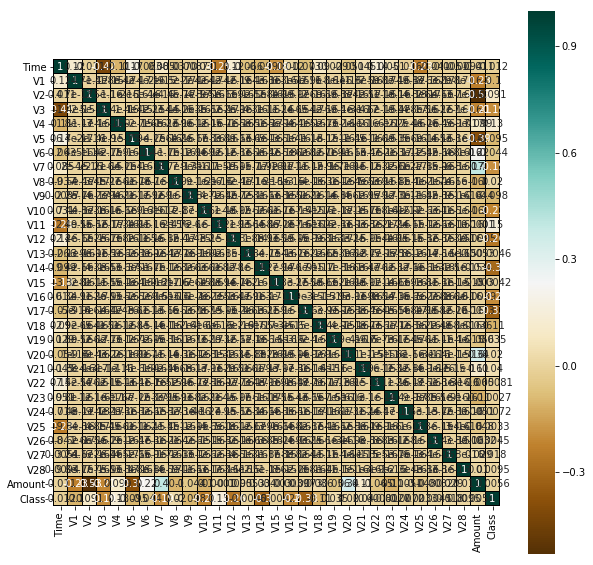

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, square=True, cmap = "BrBG", linecolor='black', annot=True, ax=ax)

---

This seems like a logistics regression problem to sort out the fraud and non fradulant account

In [9]:
lr = LogisticRegression()

In [10]:
X_down = df_downsampled.drop('Class', 1)
Y_down = df_downsampled['Class']


# Use GS-CV to see which alpha level is best.
parameters = {
             'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

lr_grid = GridSearchCV(lr, parameters, cv=5, verbose=1)

#Fit the logistic regression 
lr_grid.fit(X_down, Y_down)

#return best parameters and best score
print('Best parameters:')
print(lr_grid.best_params_)
print('Best Score:')
print(lr_grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:
{'C': 0.1}
Best Score:
0.9247967479674797


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.1s finished


In [11]:
cross_val_score(lr_grid, X_down, Y_down, cv=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.9s finished


array([0.96      , 0.97      , 1.        , 0.8877551 , 0.87755102,
       0.94897959, 0.96938776, 0.90816327, 0.90816327, 0.85714286])

In [12]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = df_downsampled['Class']
X = df_downsampled[['Amount', 'V1', 'V2']] #the more variables the more it overfits 

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by Fraud status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

#class imbalance produces high accuracy, revisit after down sampling.

cross_val_score(lr, X, y, cv=5)

Coefficients
[[ 0.003643   -0.26436033  0.69937668]]
[-1.3970231]

 Accuracy by Fraud status
Class    0    1
row_0          
0      442  115
1       50  377

 Percentage accuracy
0.8323170731707317


array([0.87373737, 0.81313131, 0.77040816, 0.85204082, 0.77040816])

---

This also seems like a classification problem so lets try using Random Forest to see the outcome

In [13]:
rfc = ensemble.RandomForestClassifier()

#Imbalanced data
X = df_downsampled.drop('Class', 1)
Y = df_downsampled['Class']

# Create rfc parameters for GS-CV
param_grid = {'n_estimators': [10, 25, 50, 75, 100, 200, 500, 1000],
             'max_features': [2, 4, 6, 8],
             'max_depth': [2, 4, 6, 8]} #check bagging and sub-sampling

# Set up GS-CV
grid = GridSearchCV(rfc, param_grid, cv=5, verbose=3, n_jobs=-1)

grid.fit(X, Y)

# Show the best parameter and best score for unfiltered
print('Best Parameter for data:', grid.best_params_)
print('\nBest Score for data:', grid.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.5min finished


Best Parameter for data: {'max_depth': 8, 'max_features': 8, 'n_estimators': 500}

Best Score for data: 0.9400406504065041


In [14]:
cross_val_score(rfc, X, Y, cv=10)

array([0.93      , 0.95      , 0.98979592, 0.8877551 , 0.8877551 ,
       0.92857143, 0.98979592, 0.90816327, 0.94897959, 0.87755102])

---

Decision Tree w/ Visualizations

In [15]:
dtc = DecisionTreeClassifier()

# Set parameters for dtc
dtc_params = [{'max_features': [2, 4, 6, 8],
             'max_depth': [2, 4, 6, 8]}]

# Search for the best paramters. 
dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, n_jobs=1)

# Fit the grid and obtain results
dtc_grid.fit(X_down, Y_down)
# # Render our tree.


# Return best parameters and best score
print('Best parameters:')
print(dtc_grid.best_params_)
print('Best Score:')
print(dtc_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:
{'max_depth': 4, 'max_features': 8}
Best Score:
0.9146341463414634


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


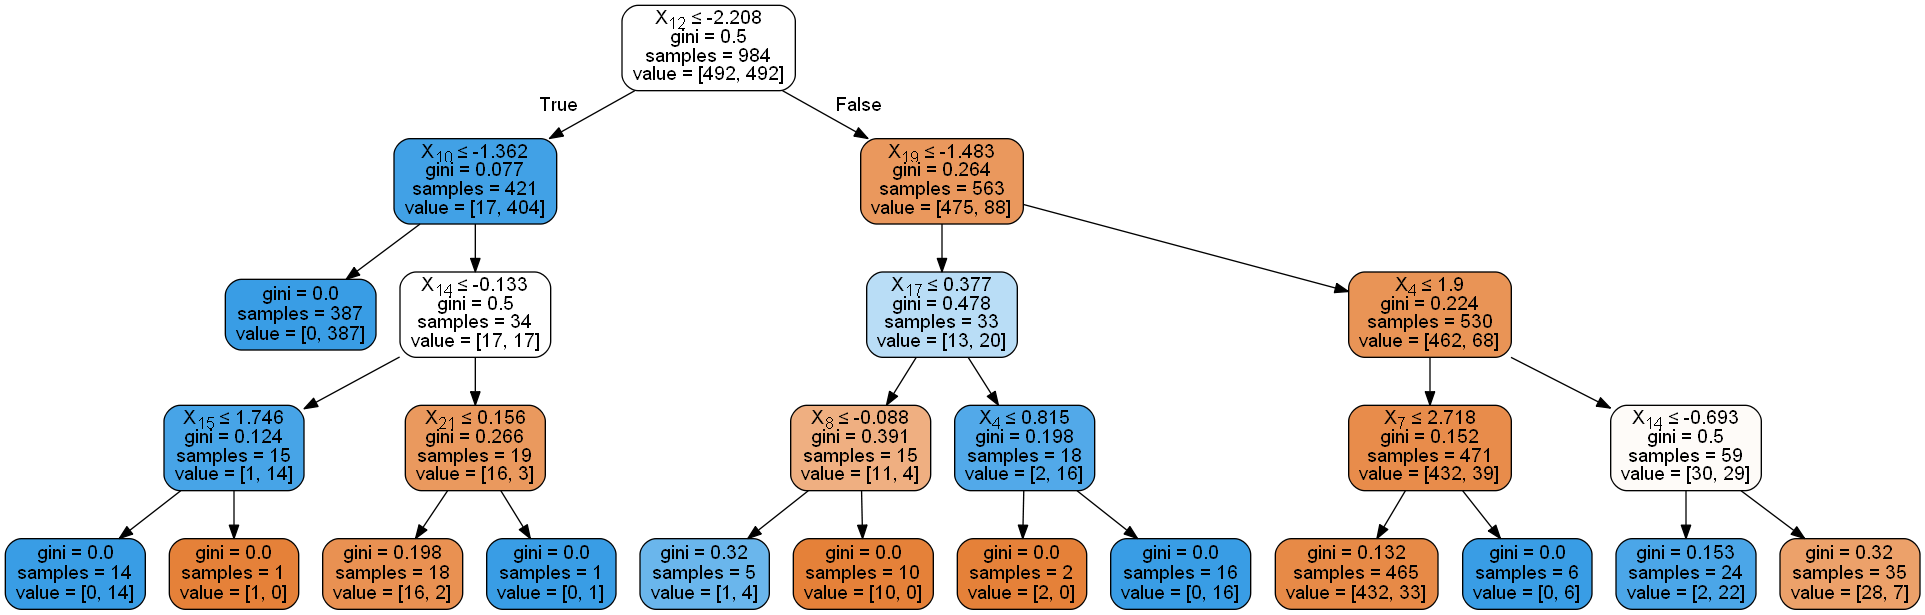

In [20]:
dtc_grid.best_estimator_.fit(X_down, Y_down)
dot_data = tree.export_graphviz(dtc_grid.best_estimator_,
                                out_file=None, filled=True, 
                                rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())